# Pre-Class Assignment: Polynomial Regression
# Day 15 
# CMSE 202
<img src="https://i.pinimg.com/originals/52/2c/20/522c209c019fe9592857bcb569184478.jpg">

### <p style="text-align: right;"> &#9989; Mohammed Alnuaimi</p>

## Goals for Pre-Class Assignment

After this pre-class assignment, you will be able to:
1. Generate data for a polynomial regression
2. Construct a set of polynomial regression models usings `statsmodels` 
3. Evaluate the quality of fit for a set of models using adjusted $R^2$ and determine the best fit
4. Explain why that model is the best fit for this data

## Our Imports

**Make sure to execute this cell!**

In [2]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

---
## 1. Polynomial Regression

Previously we focused on fitting a line to data, but as we've seen, it's possible that a straight line is not going to be good enough to model the data we are working with. We can augment our $ Ax + B$ with extra features. By adding features we are still doing linear regression, but where the features themselves can consist of, well anything.

However, to limit our focus, for this pre-class we will use polynomials. We can add values like $x^2$ or $x^5$ to the potential set of features that can be used to better map against our data. 

&#9989; **Do This**: The question we should ask ourselves is, how many such features should we add? What are the advantages and disadvantages of adding more and more features? Think about it and answer in the cell below.

<font size=+3>&#9998;</font> Do this - Erase this and put your answer here.

### 1.1 Let's make some Data

When we are first starting out with a new tool, it can be useful to generate our own data. Data we generate gives us the advantage of **knowing** what the answer should be. 

&#9989; **Do This**: Generate some data by doing the following:
* build a numpy array `x_ary`of values from -4 to 4 in increments of 0.2
* generate a corresponding `y_ary`, using the values from `x_ary`, based on the formula $x^4 + 2x^3 -15x^2 -12x + 36$
* create `y_noisy`, by adding random (uniform) noise to `y_ary` in the range of -15 to 15. Later on we might make the range bigger (say -25 to 25) or smaller (say -5 to 5) for comparison.

In [10]:
# put your code here
x_ary=np.arange(-4,4,0.2)
y_ary=(x_ary)**4+(2*x_ary**(3))-(15*x_ary**(2))-12*x_ary+36
noise = np.random.normal(-15, 15, y_ary.shape)
y_noisy = y_ary + noise

### 1.2 Plot the data

As always, it's been to look at our data before we try to model it.

&#9989; **Do This**: Plot `x_ary` vs both `y_ary` and `y_noisy`. Do it overlapping with colors, or side by side, whatever you think would look good. _Make sure to label your axes!_

Text(0, 0.5, 'Y values')

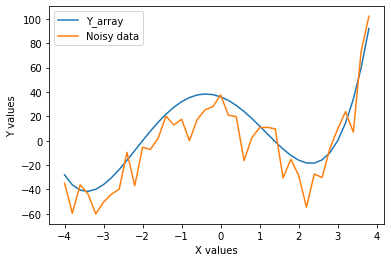

In [15]:
# put your code here
plt.plot(x_ary,y_ary,label='Y_array')
plt.plot(x_ary,y_noisy,label='Noisy data')
plt.legend()
plt.xlabel('X values')
plt.ylabel('Y values')

---
## 2 Making the Polynomial Features

Ultimately it would be nice to do our work using a `pandas` DataFrame so that we have the opportunity to label our columns. There's the added benefit that `statsmodels` works well with `pandas` DataFrames. 

&#9989; **Do This**: Make a DataFrame consisting of the following columns: a constant value for the intercept, the values in `x_ary`, and additional powers of `x_ary` up to 10.

You can do this one of two ways:
1. make the DataFrame out of `x_ary` and add features to the DataFrame
2. add columns to the `x_ary` array and then finish off by adding to a DataFrame

In the end, you have a DataFrame no matter the approach.

To state the goal for this task again, the columns of the DataFrame should be:
* Label the first column "const" and just place the value 1 in it
* make the `x_ary` data column 1, labeled "data"
* the next 9 columns should be based on `x_ary` and have as values: $x^2$, $x^3$, $x^4 \ldots$ $x^{10}$. Give them good (but short) label names

Print the head of your DataFrame when you're done to make sure it looks right. It should end up looking something like this:

<img src="https://i.ibb.co/FX5fs7f/Screen-Shot-2021-03-05-at-3-43-11-PM.png" alt="Screen-Shot-2021-03-05-at-3-43-11-PM" border="0" width=800px>

In [29]:
# put your code here
import pandas as pd
const=[1 for i in range(len(x_ary))]
data=x_ary
x2=x_ary**2
x3=x_ary**3
x4=x_ary**4
x5=x_ary**5
x6=x_ary**6
x7=x_ary**7
x8=x_ary**8
x9=x_ary**9
x10=x_ary**10


list_of_tuples = list(zip(const, data,x2,x3,x4,x5,x6,x7,x8,x9,x10))
df = pd.DataFrame(list_of_tuples,columns=['const','data','x2','x3','x4','x5','x6','x7','x8','x9','x10'])
df.head()

,const,data,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,-4.0,16.00,-64.000,256.0000,-1024.00000,4096.000000,-16384.000000,65536.000000,-262144.000000,1.048576e+06
1,1,-3.8,14.44,-54.872,208.5136,-792.35168,3010.936384,-11441.558259,43477.921385,-165216.101263,6.278212e+05
2,1,-3.6,12.96,-46.656,167.9616,-604.66176,2176.782336,-7836.416410,28211.099075,-101559.956668,3.656158e+05
3,1,-3.4,11.56,-39.304,133.6336,-454.35424,1544.804416,-5252.335014,17857.939049,-60716.992766,2.064378e+05
4,1,-3.2,10.24,-32.768,104.8576,-335.54432,1073.741824,-3435.973837,10995.116278,-35184.372089,1.125900e+05


### 2.1 Fitting using the Polynomials

We'll talk about measures of "goodness" of fit during the class, but one good measure for a multi-feature fit is the **Adjusted R-squared** value. In general, the **R-squared** describes the variance in the model that it can account for. If the R-squared is 1.0, then all the variance is accounted for an you have a perfect fit. If the value is 0 and you have no fit. However, for multiple features R-squared tends to over-estimate. The Adjusted R-squared tries to deal with this and provide a value that is better suited to multiple features.

We'll leave it to you how you want to do this, but what we'd like you to try is to fit different combinations of features against `y_noisy` and report the Adjusted R-squared value. For example, what is the Adjusted R-squared for:

1. just the const column
2. the const and data columns (which should be a line)
3. the const, data and $x^2$ columns
4. the const, data, $x^2$ and $x^3$ columns
5. $\ldots$

So on and so forth. You can do them individually or on a loop and collect the results. 

The object that is returned by the `.fit()` method is an instance of a `statsmodels` "`statsmodels.regression.linear_model.RegressionResults`". Run the `type` command on it and see. If you look on the <a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults"> statsmodels doc page </a> under "Properties" (scroll down and look for that word as a title), you will find  all values you can gather from the variable returned by `.fit()`. For this assignment the most important one of those is `.rsquared_adj`. 

&#9989; **Do This**: Explore a variety of models that fit to the noisy data using increasingly more features. Look at that value for the combination of features you selected and say which one is the "best". For this assignment, we would consider the "best" would be the highest value of `.rsquared_adj`.

**Note**: you do not have to try an exhaustive set of models (though you could set this up with a loop), just explore a variety of combinations and reflect on the results.

In [45]:
# put your code here
# RegressionResults.rsquared_adj


model = sm.OLS(y_noisy, df['const'])
results = model.fit()
print(results.rsquared_adj)



0.0


In [47]:
X=df[['const', 'data']]
x_with_cnst = sm.add_constant(X)
model = sm.OLS(y_noisy,X)
results = model.fit()
print(results.rsquared_adj)

    
    

0.24940414405385314


In [49]:
X=df[['const', 'data','x2']]
x_with_cnst = sm.add_constant(X)
model = sm.OLS(y_noisy,X)
results = model.fit()
print(results.rsquared_adj)

0.25293692508014065


In [50]:
X=df[['const', 'data','x2','x3']]
x_with_cnst = sm.add_constant(X)
model = sm.OLS(y_noisy,X)
results = model.fit()
print(results.rsquared_adj)

0.48382642058184244


In [58]:
X=df[['const', 'data','x2','x3','x4']]
x_with_cnst = sm.add_constant(X)
model = sm.OLS(y_noisy,X)
results1 = model.fit()
print(results1.rsquared_adj)

0.8538789929933116


In [52]:
X=df[['const', 'data','x2','x3','x4','x5']]
x_with_cnst = sm.add_constant(X)
model = sm.OLS(y_noisy,X)
results = model.fit()
print(results.rsquared_adj)

0.8512991833957074


In [53]:
X=df[['const', 'data','x2','x3','x4','x5','x6']]
x_with_cnst = sm.add_constant(X)
model = sm.OLS(y_noisy,X)
results = model.fit()
print(results.rsquared_adj)

0.8468682861013497


In [54]:
X=df[['const', 'data','x2','x3','x4','x5','x6','x7']]
x_with_cnst = sm.add_constant(X)
model = sm.OLS(y_noisy,X)
results = model.fit()
print(results.rsquared_adj)

0.8429838060052852


In [55]:
X=df[['const', 'data','x2','x3','x4','x5','x6','x7','x8']]
x_with_cnst = sm.add_constant(X)
model = sm.OLS(y_noisy,X)
results = model.fit()
print(results.rsquared_adj)

0.8388880975786113


In [56]:
X=df[['const', 'data','x2','x3','x4','x5','x6','x7','x8','x9']]
x_with_cnst = sm.add_constant(X)
model = sm.OLS(y_noisy,X)
results = model.fit()
print(results.rsquared_adj)

0.8368837424971662


In [57]:
X=df[['const', 'data','x2','x3','x4','x5','x6','x7','x8','x9','x10']]
x_with_cnst = sm.add_constant(X)
model = sm.OLS(y_noisy,X)
results = model.fit()
print(results.rsquared_adj)

0.8379915813184884


&#9989; **Questions**: Which combination of features best "fit" your data? What was the Adjusted R-squared? Why might that combination produce the best fit?

<font size=+3>&#9998;</font> the const and x1,x2,x3,x4 was the best one we had, Adjusted r squared value was .85 which awesome. Because i believe its the closest to the noisy data since we had -15 or 15, and x to the power of 4 was the closest

---
## 3 Plot your data and your model

&#9989; **Do this**:  Plot `x_ary` vs `y_noisy` and `x_ary` vs the best fitted values based on the adjusted R-squared value. Do it in the same graph. Again, the Property `.fittedvalues` gives out a panda Series with the fitted values (the y values for your best fit model). Also print out the summary for the variable returned by `.fit()`

Your plot might end up looking something like this:

<img src="https://i.ibb.co/z6LrB3N/best-fit.png" alt="best-fit" border="0" width=300>

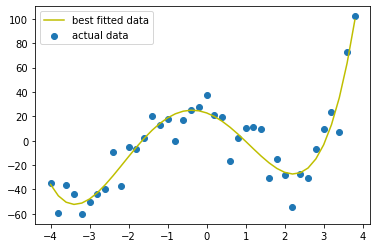

In [63]:
# put your code here
plt.scatter(x_ary,y_noisy,label='actual data')
plt.plot(x_ary,results1.fittedvalues,color='y',label='best fitted data')
plt.legend()

In [65]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     57.98
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           5.88e-15
Time:                        22:06:45   Log-Likelihood:                -157.44
No. Observations:                  40   AIC:                             324.9
Df Residuals:                      35   BIC:                             333.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7843      3.928      5.800      0.0

### 3.1 Are we justified in using this model?

As we did previously, we can check how well we are justified in using this model, by looking at the residual plot. 

&#9989; **Do this**: Again, using `plot_regress_exog`, plot the residuals as a function of the independent variable (`data` or `x`, whatever you called it).

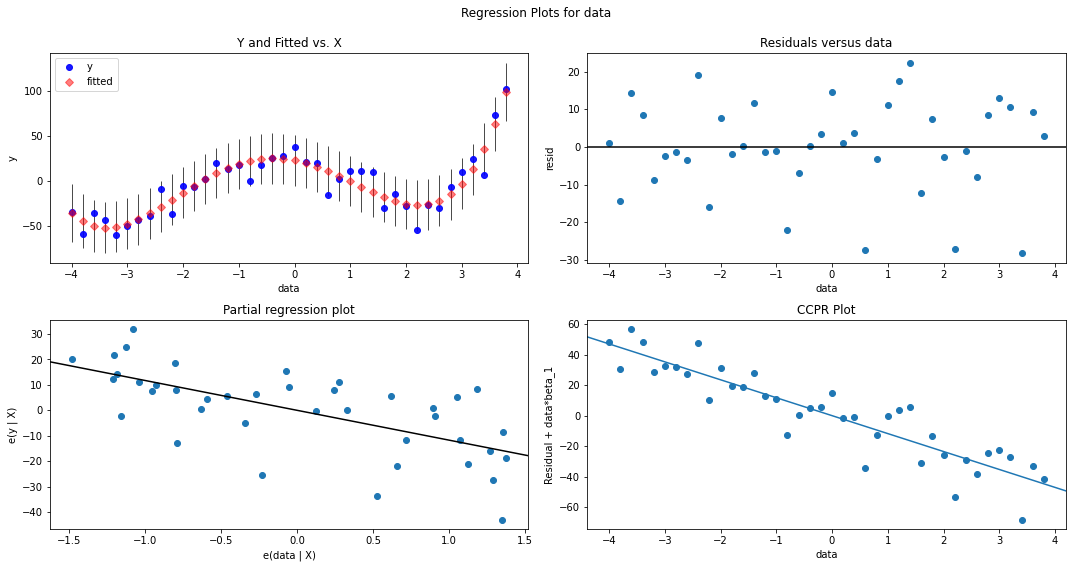

In [66]:
# put your code here
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(results1,'data' ,fig=fig)


&#9989; **Question**: Do we appear justified in using this model? Why or why not? 

<font size=+3>&#9998;</font> Yes we appear justified because there is no linear covariance

---
## Follow-up Questions

Copy and paste the following questions into the appropriate box in the assignment survey include below and answer them there. (Note: You'll have to fill out the assignment number and go to the "NEXT" section of the survey to paste in these questions.)

1. Which combination of features best "fit" your data? What was the Adjusted R-squared? Why might that combination produce the best fit? (you should be able to copy your answer to this question from above)

2. Based on your plot of the residuals, do we appear justified in using this model? Why or why not? (you should be able to copy your answer to this question from above)

----

# Assignment wrap-up

Hopefully you were able to get through all of that. We'll be trouble-shooting any issues you had

**You must completely fill this out in order to receive credit for the assignment!**

In [67]:
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse202-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, you're done with your pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for the appropriate pre-class submission folder (Don't forget to add your name in the first cell).